In [1]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/Colab Notebooks/Datasets/'

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Prediction of heart-disease

In [3]:
df = pd.read_csv(path+"heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.shape

(303, 14)

In [5]:
# EDA

df.isna().sum()    # There are no null values in dataset


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df["target"].value_counts()  # 1-yes  0 - no

1    165
0    138
Name: target, dtype: int64

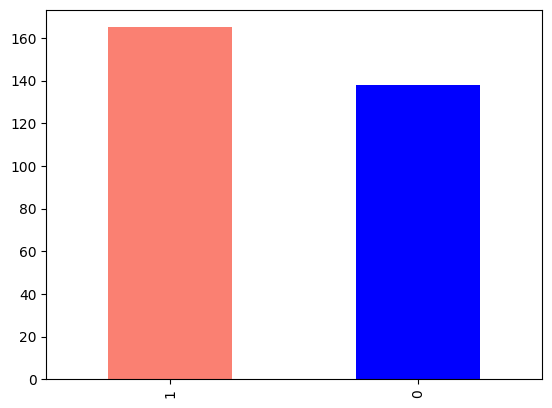

In [8]:
# visualize
df["target"].value_counts().plot(kind='bar',color=['salmon','blue']);

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart disesase frequency according to Sex

In [11]:
df.sex.value_counts()  # 1-male  0-feamle

1    207
0     96
Name: sex, dtype: int64

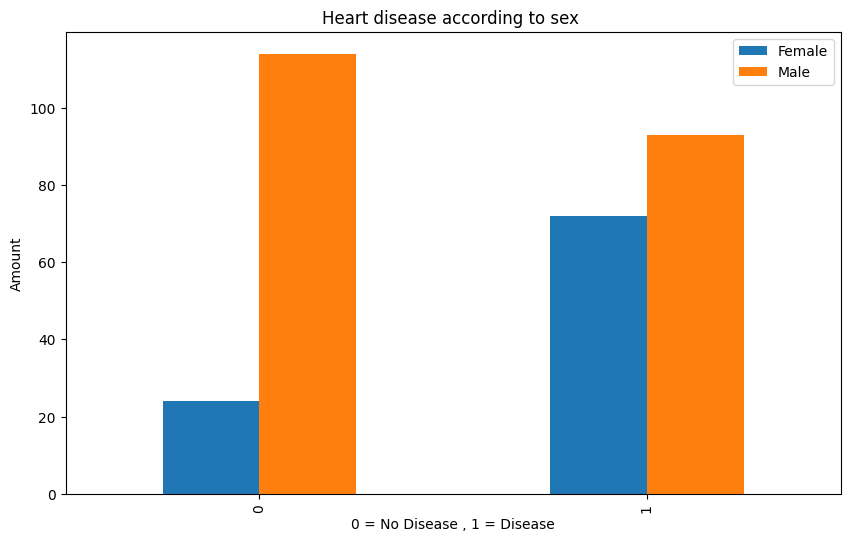

In [12]:
# comapre target with sex column
pd.crosstab(df.target,df.sex).plot(kind='bar',figsize=(10,6))
plt.xlabel("0 = No Disease , 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.title("Heart disease according to sex ");

In [13]:
# max heart rate achieved
df["thalach"].value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

##   Age vs heart-Rate


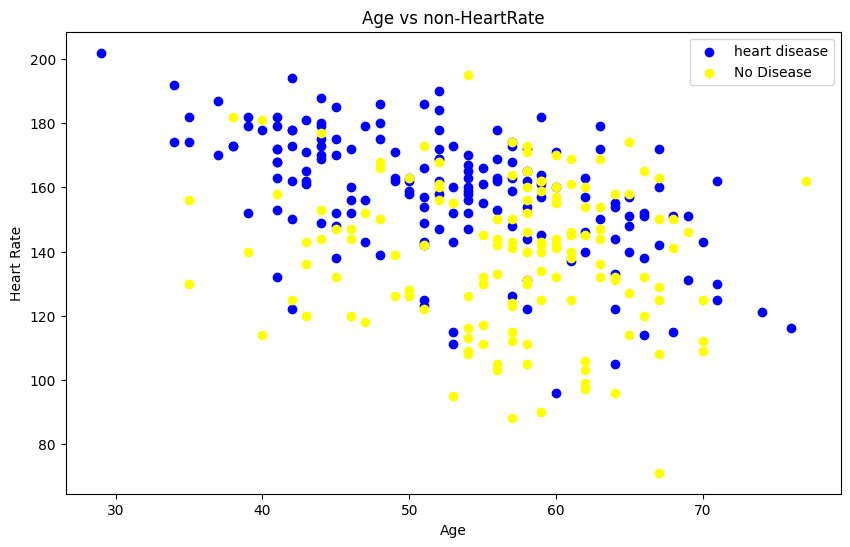

In [14]:
plt.figure(figsize=(10,6))

plt.scatter(df.age[df.target == 1],df.thalach[df.target == 1],c="blue");
plt.title("Age vs HeartRate")
plt.xlabel('Age')
plt.ylabel('Heart Rate')

# check with without heart rate

plt.scatter(df.age[df.target == 0],df.thalach[df.target == 0],c="yellow");
plt.title("Age vs non-HeartRate")
plt.xlabel('Age')

plt.legend(["heart disease","No Disease"])

# cp - chest pain type
`.` 0: Typical angina: chest pain related decrease blood supply to the heart

`.` 1: Atypical angina: chest pain not related to heart

`.` 2: Non-anginal pain: typically esophageal spasms (non heart related)

`.` 3: Asymptomatic: chest pain not showing signs of disease

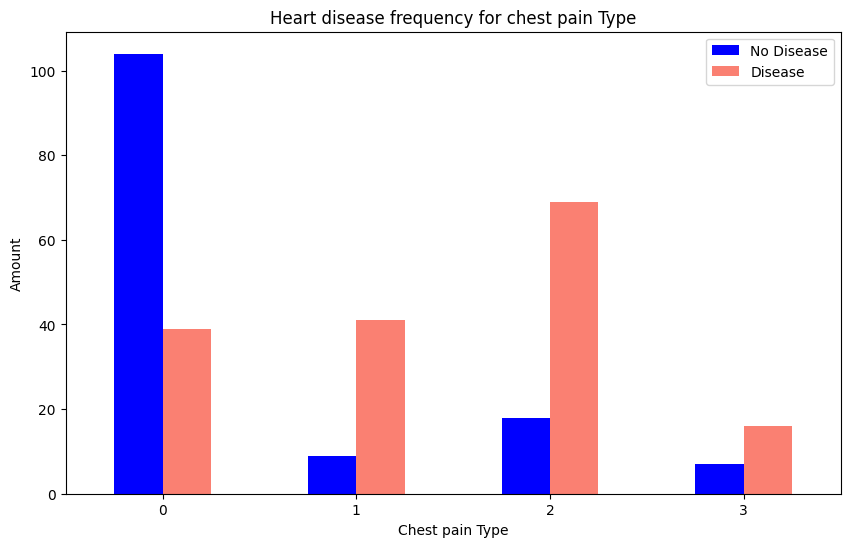

In [15]:
# heart disease frequency for chest pain for comparision
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(10,6),color=["blue","salmon"])

plt.title("Heart disease frequency for chest pain Type")
plt.xlabel("Chest pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0);

In [16]:
 # Correlation matrix
df.corr()   # ρ (X,Y) = cov (X,Y) / σX        .  ----------------- Corr(X,Y) = Cov[X,Y] / ( StdDev(X) ∙ StdDev(Y) )

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


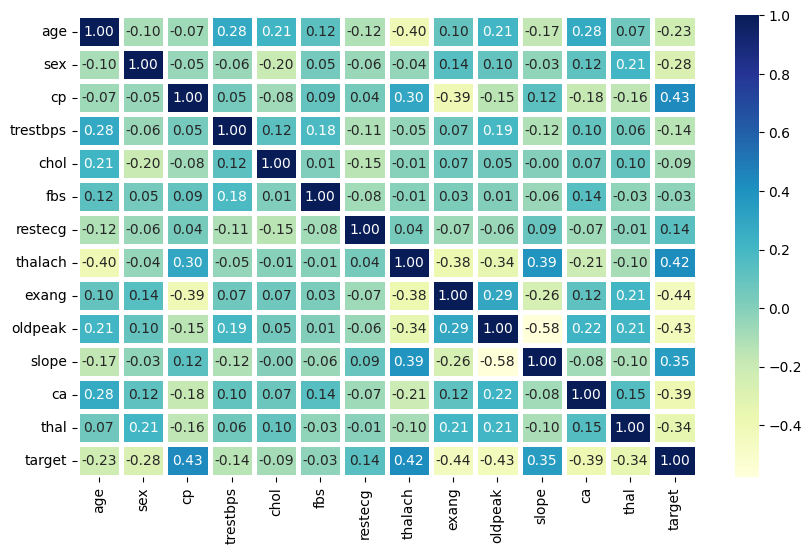

In [17]:
corr_mat = df.corr()
fig,ax = plt.subplots(figsize=(10,6))
ax = sns.heatmap(corr_mat,annot=True,linewidth=3.5,cmap='YlGnBu',fmt=".2f")

# Modelling

In [18]:
# split x and y
x = df.drop("target",axis=1)
y = df["target"]

In [19]:
np.random.seed(42)

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)


In [20]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [104]:
x_train.to_csv("heart_xtrain.csv")
y_train.to_csv("heart_y_train.csv")
x_test.to_csv("heart_xtest.csv")

### Now train patterns and test patterns

  3 MODELS USED FOR MODELLING

  ->  Logistic Regression

  ->  K-Nearest Neighbours Classifier
  
  ->  Random Forest Classifier

In [21]:
### check sklearn map

## put models in dictionary
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest" : RandomForestClassifier()
}

# Create function to fit and score model

def fit_score(models,x_train,x_test,y_train,y_test):
  np.random.seed(42)
  # Make dictionary for model scores

  model_scores = {}

  for name,model in models.items():
    # fit model
    model.fit(x_train,y_train)
    # Evaluate model
    model_scores[name] = model.score(x_test,y_test)
  return model_scores

In [22]:
model_scores = fit_score(models=models,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test)
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## MODEL COMPARISION

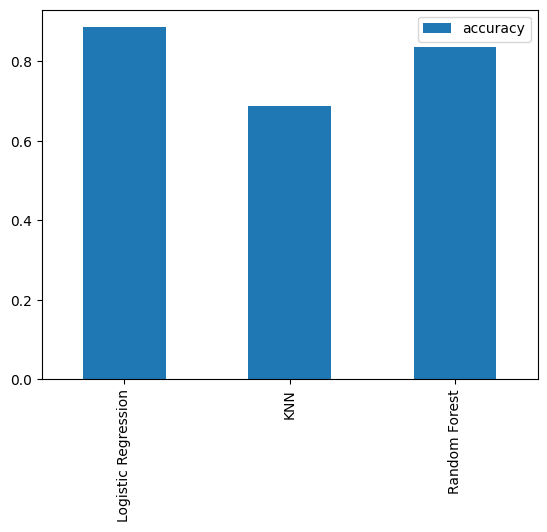

In [23]:
model_compare = pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar();

* Hyperparameter tuning 4

* Feature importance

* confusion matrix

* cross-validation

* precision

* Recall

* F1 score

* Classification Report

* ROC curve

* Area under the curve(AUC)

For the improvement of the model we have to perform this and check the report

### Hyper parameter tuning

In [24]:
# For KNN

train_scores = []
test_scores = []


# Create a list for  different values of n_neighbors
neighbors = range(1,21)  # 20 diff knn models

# set KNN instance

knn = KNeighborsClassifier()

for i in neighbors:
  knn.set_params(n_neighbors = i)

  # Fit
  knn.fit(x_train,y_train)

  train_scores.append(knn.score(x_train,y_train))
  test_scores.append(knn.score(x_test,y_test))

In [29]:
len(train_scores)
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [30]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score of test data : 75.41%


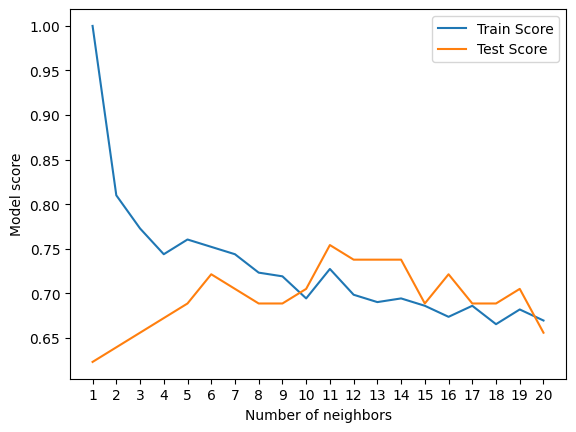

In [33]:
plt.plot(neighbors,train_scores,label="Train Score")
plt.plot(neighbors,test_scores,label = "Test Score")
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score of test data : {max(test_scores)*100:.2f}%")
plt.xticks(np.arange(1, 21, step=1));

# Hyperparameter tuning with randomized cv

* Logistic Regression()
* RandomForest Classifier()
using rcv

In [34]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [49]:
from sklearn.model_selection import RandomizedSearchCV
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

rs_log_reg.fit(x_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [50]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [51]:
rs_log_reg.score(x_test,y_test)

0.8852459016393442

In [52]:
# Random Forest

np.random.seed(42)

rs_rf =  RandomizedSearchCV(RandomForestClassifier(),
                            param_distributions=rf_grid,
                            cv=10,
                            n_iter=20,
                            verbose=True)

rs_rf.fit(x_train,y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [53]:
rs_rf.best_params_

{'n_estimators': 310,
 'min_samples_split': 2,
 'min_samples_leaf': 19,
 'max_depth': 5}

In [54]:
rs_rf.score(x_test,y_test)

0.8688524590163934

## Hyperparameters Tuning using GridSearchCV

In [55]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [56]:
from sklearn.model_selection import GridSearchCV
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

gs_log_reg.fit(x_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [57]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [58]:
gs_log_reg.score(x_test, y_test)

0.8852459016393442

# Evaluating model

* ROC and AUC Score
* classification Report
* Precision
* Recall
* F1-score

In [59]:
y_preds = gs_log_reg.predict(x_test)

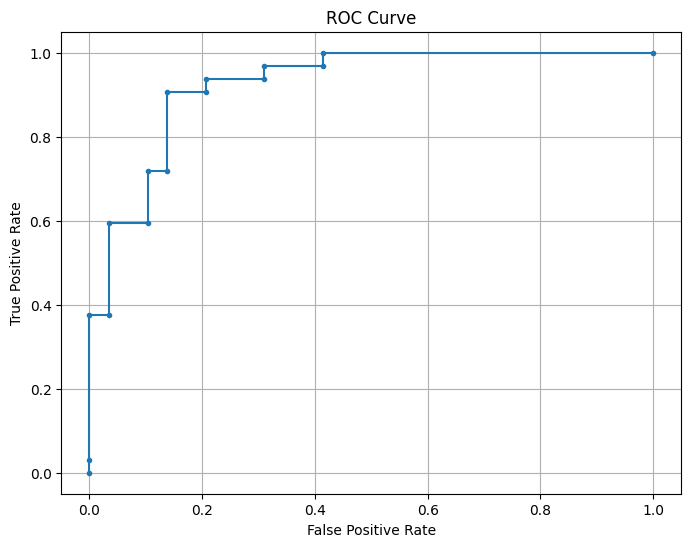

In [66]:
# Plot true positive against false positive

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Get predicted probabilities for the positive class
y_prob = gs_log_reg.predict_proba(x_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot TPR against FPR
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid()
plt.show()


In [68]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


(array([0.5, 1.5]), [Text(0.5, 0, '0'), Text(1.5, 0, '1')])

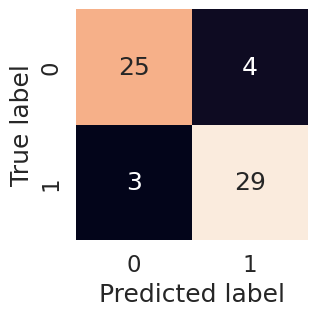

In [71]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):

  fig, ax = plt.subplots(figsize=(3, 3))
  ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)
  plt.xlabel("Predicted label")
  plt.ylabel("True label")


plot_conf_mat(y_test, y_preds)
plt.xticks(rotation=0)

In [73]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [74]:
## Calculate Evaluation metric using cross validation

gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [75]:
# Create a New classifier with best params
clf = LogisticRegression(C=0.20433597178569418, solver= 'liblinear')

In [77]:
# Cross validated accuracy
from sklearn.model_selection import cross_val_score
cv_acc = cross_val_score(clf,x,y,cv=5,scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [78]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [79]:
# Cross validated precision
cv_pre = cross_val_score(clf,x,y,cv=5,scoring="precision")
cv_pre

array([0.775     , 0.88571429, 0.85714286, 0.86111111, 0.725     ])

In [80]:
cv_pre = np.mean(cv_pre)
cv_pre

0.8207936507936507

In [82]:
# Cross validated Recall
cv_recall = cross_val_score(clf,x,y,cv=5,scoring="recall")
cv_recall

array([0.93939394, 0.93939394, 0.90909091, 0.93939394, 0.87878788])

In [83]:
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [84]:
# Cross validated F1-score
cv_F1 = cross_val_score(clf,x,y,cv=5,scoring="f1")
cv_F1

array([0.84931507, 0.91176471, 0.88235294, 0.89855072, 0.79452055])

In [85]:
cv_F1 = np.mean(cv_F1)
cv_F1

0.8673007976269721

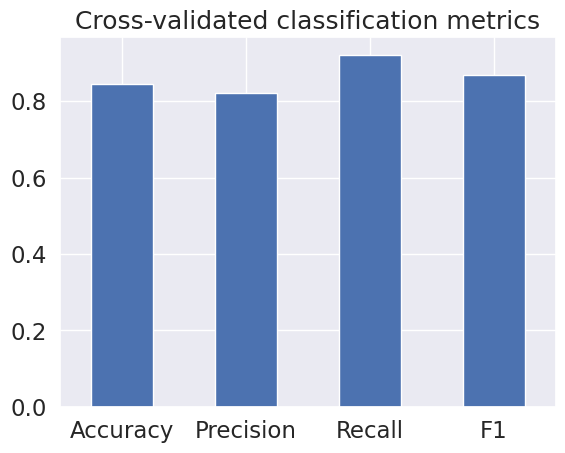

In [91]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_pre,
                           "Recall": cv_recall,
                           "F1": cv_F1},
                           index=[0]
                          )

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);
plt.xticks(rotation=0);

# Feature Importance

Feature importance is another as asking, "which features contributed most to the outcomes of the model and how did they contribute?"

In [92]:
clf = LogisticRegression(C=0.20433597178569418, solver= 'liblinear')
clf.fit(x_train,y_train);

In [93]:
# check coefficient
clf.coef_

array([[ 0.00320769, -0.86062049,  0.66001432, -0.01155971, -0.00166496,
         0.04017236,  0.31603405,  0.02458922, -0.60470171, -0.56795456,
         0.45085392, -0.63733328, -0.67555094]])

In [98]:
# Match coef to columns

feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0032076883508599633,
 'sex': -0.8606204883695241,
 'cp': 0.660014324982524,
 'trestbps': -0.01155970600550047,
 'chol': -0.0016649614843449207,
 'fbs': 0.040172360271308105,
 'restecg': 0.31603405294617176,
 'thalach': 0.02458922341328129,
 'exang': -0.604701713592625,
 'oldpeak': -0.5679545646616215,
 'slope': 0.4508539209693025,
 'ca': -0.6373332766360461,
 'thal': -0.6755509369619848}

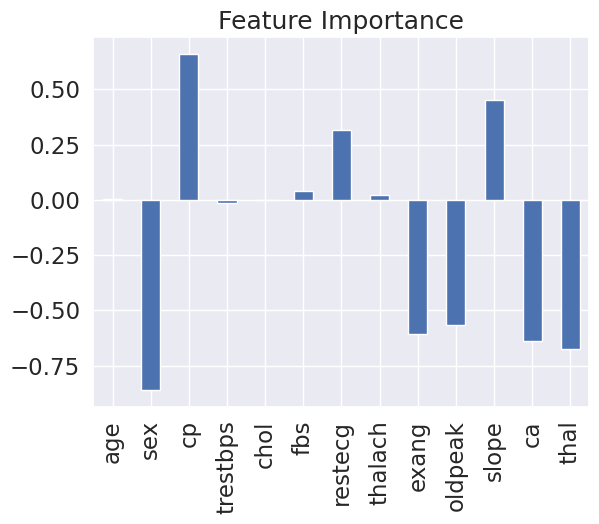

In [100]:
# Visualization
feature_plot = pd.DataFrame(feature_dict,index=[0])
feature_plot.T.plot.bar(title="Feature Importance",legend=False);

In [103]:
pd.crosstab(df["slope"],df["target"])   # positive correlation

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


slope - the slope of the peak exercise ST segment

0: Upsloping: better heart rate with excercise (uncommon)

1: Flatsloping: minimal change (typical healthy heart)

2: Downslopins: signs of unhealthy heart

In [102]:
pd.crosstab(df["cp"],df["target"])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


* For "cp" category 0 (which likely corresponds to a specific type of chest pain), there are 104 cases with no heart disease (target 0) and 39 cases with heart disease (target 1).

* For "cp" category 1, there are 9 cases with no heart disease and 41 cases with heart disease.

* For "cp" category 2, there are 18 cases with no heart disease and 69 cases with heart disease.

* For "cp" category 3, there are 7 cases with no heart disease and 16 cases with heart disease.